In [1]:
#Importer moduler
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib as plt
import datetime

In [2]:
#importer CSV
url = 'https://raw.githubusercontent.com/umaimehm/Intro_to_AI_2021/main/assignment1/Ruter_data.csv'

In [3]:
# Les datasett med komma som separator
df = pd.read_csv(url, sep=';')

In [4]:
# Se første 5 rader for å få en oversikt over datasettet
df.head()

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,10:53:53,10:53:59,10:53:00,10:53:00,112,5
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,13:12:20,13:12:26,13:12:00,13:12:00,112,5
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,10:18:56,10:19:21,10:19:00,10:19:00,112,6
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,13:52:04,13:52:26,13:51:00,13:51:00,112,10
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,07:34:13,07:34:53,07:33:00,07:33:00,112,10


In [5]:
# Endre alle tomme celler til np.nan
df=df.replace(r'^\s*$', np.nan, regex=True)
# Se etter null-verdier
df.isna().sum()

TurId                                        0
Dato                                         0
Fylke                                        0
Område                                       0
Kommune                                      0
Holdeplass_Fra                               0
Holdeplass_Til                               0
Linjetype                                    0
Linjefylke                                   0
Linjenavn                                    0
Linjeretning                                 0
Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra     0
Tidspunkt_Faktisk_Avgang_Holdeplass_Fra      0
Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra    0
Tidspunkt_Planlagt_Avgang_Holdeplass_Fra     0
Kjøretøy_Kapasitet                           0
Passasjerer_Ombord                           0
dtype: int64

<AxesSubplot:>

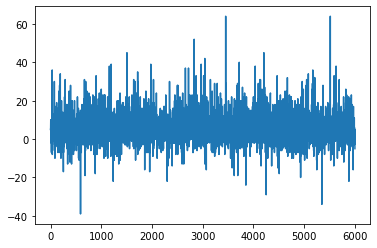

In [6]:
#Eksempel på hvordan se etter outliers. Her ser vi at vi har nokså mange minusverdier
df["Passasjerer_Ombord"].plot.line()

<AxesSubplot:>

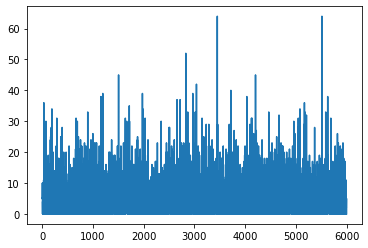

In [7]:
# Erstatt alle minusverdier med 0 - Kan ikke være mindre enn null passasjerer
df["Passasjerer_Ombord"] = np.where(df["Passasjerer_Ombord"]<0, 0, df["Passasjerer_Ombord"])
df["Passasjerer_Ombord"].plot.line()

<AxesSubplot:>

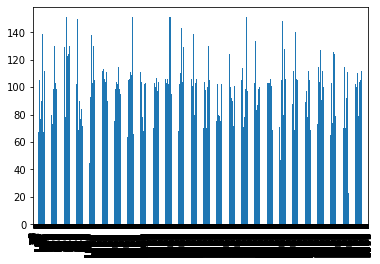

In [8]:
# Feature nr.1: Antall ledige plasser på bussen
df["LedigePlasser"] = df['Kjøretøy_Kapasitet'] - df["Passasjerer_Ombord"]
df["LedigePlasser"].plot.bar()

In [9]:
# Feature nr.2 - Gjør linjetype lesbart
# Linjetype er i plain tekst - kan ikke leses av AI
linjeTyper = df["Linjetype"].unique()
linjeTyper


array(['Lokal', 'Skole', 'Ekspress', 'Natt'], dtype=object)

In [10]:
# Konverterer alle linjetyper til nummer 0-3
linjeTypeConditions = [
    (df["Linjetype"] == linjeTyper[0]),
    (df["Linjetype"] == linjeTyper[1]),
    (df["Linjetype"] == linjeTyper[2]),
    (df["Linjetype"] == linjeTyper[3]),
]
df["LinjeTypeNummer"] = np.select(linjeTypeConditions, [0, 1, 2, 3])
#Teller opp alle linjene etter linjetype
df_linjeTypeGroupedByNummer = df.groupby('LinjeTypeNummer')
df_linjeTypeCount = df_linjeTypeGroupedByNummer.count()
df_linjeTypeCount.Linjetype

LinjeTypeNummer
0    5741
1      63
2     193
3       3
Name: Linjetype, dtype: int64

<AxesSubplot:xlabel='LinjeTypeNummer'>

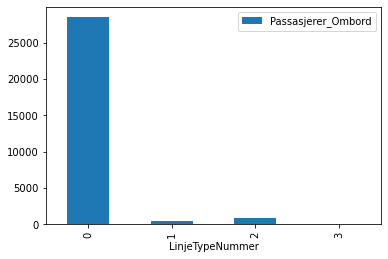

In [11]:
# Viser et chart som viser hvor mange som tar de ulike Linjetypene
df_linjeTypeSum = df_linjeTypeGroupedByNummer.sum()
# Viser et chart med summen av passasjerer ombord per Linjetype
df_linjeTypeSum.plot.bar(y='Passasjerer_Ombord')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 19 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   TurId                                      6000 non-null   object
 1   Dato                                       6000 non-null   object
 2   Fylke                                      6000 non-null   object
 3   Område                                     6000 non-null   object
 4   Kommune                                    6000 non-null   object
 5   Holdeplass_Fra                             6000 non-null   object
 6   Holdeplass_Til                             6000 non-null   object
 7   Linjetype                                  6000 non-null   object
 8   Linjefylke                                 6000 non-null   object
 9   Linjenavn                                  6000 non-null   object
 10  Linjeretning                        

In [13]:
df.sample(5)

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord,LedigePlasser,LinjeTypeNummer
4127,47009-2020-08-14T08:00:00+02:00,14/08/2020,Viken,Nordøst,Aurskog-Høland,Killingmo veikryss,Finstadhagan,Lokal,Viken,470,1,08:32:09,08:32:09,08:29:00,08:29:00,106,5,101,0
1264,39013-2020-06-22T21:32:00+02:00,22/06/2020,Oslo,Nordøst,Bjerke,Linderudsletta (mot Brobekk),Øvre Lunden (mot Bjerke),Lokal,Viken,380,0,22:07:55,22:08:01,22:07:00,22:07:00,115,12,103,0
1020,10014-2020-06-06T15:04:00+02:00,06/06/2020,Viken,Nordøst,Lillestrøm,Stasjonsveien,Strømsbergveien,Lokal,Viken,100,0,15:31:58,15:32:34,15:22:00,15:22:00,151,18,133,0
5994,12001-2020-06-02T23:15:00+02:00,02/06/2020,Viken,Nordøst,Rælingen,Kurlandsveien,Frydenbergveien,Lokal,Viken,310,0,23:29:01,23:29:05,23:27:00,23:27:00,72,0,72,0
4719,30018-2020-06-19T17:15:00+02:00,19/06/2020,Viken,Nordøst,Lørenskog,Rasta senter,Glenneveien,Lokal,Viken,110,1,17:43:24,17:43:50,17:39:00,17:39:00,106,11,95,0


In [14]:
# Feature 3 - Sjekke om ankomst er forsinket per kommune
df["datetimeForventetAnkomst"] = pd.to_datetime((df['Dato'].str.cat(df["Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra"], sep=' ')), errors='coerce')
df["datetimeFaktiskAnkomst"] = pd.to_datetime((df['Dato'].str.cat(df["Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra"], sep=' ')), errors='coerce')
df["AnkomstForsinket"] = (df["datetimeForventetAnkomst"]<df["datetimeFaktiskAnkomst"]).astype(int)
df.sample(10)


,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,...,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord,LedigePlasser,LinjeTypeNummer,datetimeForventetAnkomst,datetimeFaktiskAnkomst,AnkomstForsinket
2248,36508-2020-06-25T15:28:00+02:00,25/06/2020,Viken,Nordøst,Lillestrøm,Lørenfallet,Fallbrauta,Lokal,Viken,365,...,15:56:41,15:57:00,15:57:00,75,3,72,0,2020-06-25 15:57:00,2020-06-25 15:56:07,0
1179,3107-2020-07-08T06:16:00+02:00,08/07/2020,Viken,Vest,Bærum,Rolfstangen (mot Lysaker),IT Fornebu (fiktivt pkt ifm. arrangement),Lokal,Oslo,31,...,06:21:55,06:20:00,06:20:00,151,4,147,0,2020-08-07 06:20:00,2020-08-07 06:21:31,1
4643,24006-2020-08-18T14:59:00+02:00,18/08/2020,Viken,Vest,Asker,Otto Blehrs vei,Hals,Lokal,Viken,265,...,15:28:27,15:26:00,15:26:00,69,19,50,0,2020-08-18 15:26:00,2020-08-18 15:27:53,1
2217,55007-2020-06-22T07:30:00+02:00,22/06/2020,Viken,Sør,Enebakk,Fredheimveien,Bjerke,Lokal,Viken,350,...,07:59:48,07:59:00,07:59:00,80,0,80,0,2020-06-22 07:59:00,2020-06-22 07:59:24,1
5266,36506-2020-08-18T06:20:00+02:00,18/08/2020,Viken,Nordøst,Lillestrøm,Festiviteten,Nordsjø,Lokal,Viken,370A,...,06:22:16,06:21:00,06:21:00,75,0,75,0,2020-08-18 06:21:00,2020-08-18 06:22:11,1
5674,36502-2020-06-10T05:31:00+02:00,10/06/2020,Viken,Nordøst,Lillestrøm,Skedsmokorset (Plattform 1),Midtskogveien,Lokal,Viken,340,...,05:32:09,05:31:00,05:31:00,105,0,105,0,2020-10-06 05:31:00,2020-10-06 05:25:27,0
87,55006-2020-07-16T20:00:00+02:00,16/07/2020,Viken,Sør,Enebakk,Gjeddevannsveien,Bjerke,Lokal,Viken,350,...,20:35:34,20:32:00,20:32:00,80,0,80,0,2020-07-16 20:32:00,2020-07-16 20:35:28,1
1906,39013-2020-06-03T07:55:00+02:00,03/06/2020,Viken,Nordøst,Nittedal,Gunhildstua,Kirkeby skole,Lokal,Viken,390,...,08:51:25,08:48:00,08:48:00,112,0,112,0,2020-03-06 08:48:00,2020-03-06 08:51:21,1
2312,45001-2020-07-29T19:30:00+02:00,29/07/2020,Viken,Nordøst,Nes,Trekanten,Udnes barnepark,Lokal,Viken,450,...,19:38:44,19:37:00,19:37:00,106,2,104,0,2020-07-29 19:37:00,2020-07-29 19:38:40,1
1816,7403-2020-08-28T11:53:00+02:00,28/08/2020,Oslo,Sør,Nordstrand,Munkerud (mot Skullerudkrysset),P. A. Holms vei (mot Skullerudkrysset),Lokal,Oslo,74,...,12:21:50,12:18:00,12:18:00,72,4,68,0,2020-08-28 12:18:00,2020-08-28 12:21:25,1


<AxesSubplot:xlabel='Kommune'>

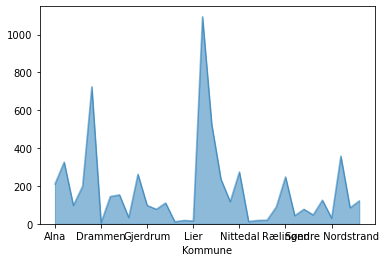

In [15]:
df_areaData = df.groupby('Kommune').count()
df_areaData['AnkomstForsinket'].plot.area(stacked=False)

<AxesSubplot:xlabel='Kommune'>

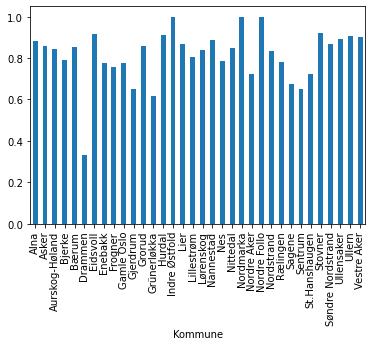

In [16]:
#Feature 4 - Gjennomsnittlig prosentvis hvor mange ruter som blir forsinket per kommune
df["TidForsinket"] = df["datetimeFaktiskAnkomst"]-df["datetimeForventetAnkomst"]
df_tidForsinketGroup = df.groupby('Kommune').mean()
df_tidForsinketGroup["AnkomstForsinket"].plot.bar()

In [17]:
# Feature 5 - Antall busser gruppert etter Kapasitet på kjøretøy og kommune i AUGUST
# Eksempel for å vise med to akser
df["RuteKjørtIAugust"] = (pd.to_datetime(df["Dato"], errors='coerce').dt.month == 8).astype(int)

df_DatasettKjørtIAugust = df.drop(df[df.RuteKjørtIAugust < 1].index)

df_KjøretøyKapasitetGroupByKommune = (
    df_DatasettKjørtIAugust.groupby('Kommune')
    .Kjøretøy_Kapasitet
    .value_counts()
    .unstack()
    .fillna(0)
)


<AxesSubplot:xlabel='Kjøretøy_Kapasitet', ylabel='Kommune'>

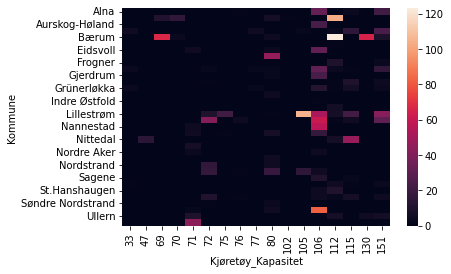

In [18]:
# Lastet ned Seaborn for å vise heatmap
# Grafen under viser hvor mange reiser som ble utført av busser gruppert etter kapasitet på kjøretøy og kommune i AUGUST.
# Lysere farge betyr flere hyppigere reiser i august.
sns.heatmap(df_KjøretøyKapasitetGroupByKommune)